# Autómata para resaltado de síntaxis en Python
Integrantes
* Marcos Duván Nítola Rodríguez
* Diego Andrés Toscano Zabala
* Jefersson Alejandro Galeano Hernández

## Desarrollo

In [1]:
# Ejecute esta celda para importar las librerías necesarias
!pwd
!pip install automata-lib==1.0.0.post4

from automata.fa.nfa import NFA
from automata.fa.dfa import DFA
from google.colab import files

/content
  Created wheel for automata-lib: filename=automata_lib-1.0.0.post4-py3-none-any.whl size=13312 sha256=0b01e4736bc69f64884a649d1f0507a67520310c49a2785e81ae02014431bc5c
  Stored in directory: /root/.cache/pip/wheels/96/2f/27/40b605b129cb6410b34fd325d9e491ff88c1f3e8d8dfcedc64
Successfully built automata-lib


Diccionarios


In [2]:
# Diccionario de palabras reservadas en Python
palResAz = {1: "and", 2:"class",  3:"def",  4:"global",  5:"in", 6:"is", 7:"lambda", 8:"not", 9:"or"}
palResRos = { 1:'assert', 2:'break',3:'continue', 4:'del', 5:'elif', 6:'else', 7:'except', 8:'finally', 9:'for',
             10:'from', 11:'if', 12:'pass', 13:'raise', 14:'return', 15:'try', 16:'while', 17:'with', 18:'yield', 18:'do'}
palResNeg  = {1:'exec',2:'import',3:'print'}

codig = []


Funciones de Verificacion:

1)Verificacion de palabra en diccionario(verfidicc)

2)Abstraccion de codigo(Prototraductor)

3)Codigo de implementacion sin automata(Protoejecucion)

In [3]:
# Verifica que una palabra pertenezca al diccionario
def verfidicc(palabra,dicc):
    for keys in dicc:
        if (dicc[keys] == palabra):
            return True
            break
        
# Función que reemplaza palabras reservadas en comandos
def prototraductor(codigo):
    codig.clear()
    codigo_abstraido = ""
    ram=""
    esTextoCmn = True

    for ch in codigo:
        # print(ch,codigo_abstraido,ram)
        if (ord(ch)>=65 and ord(ch) <= 90) or (ord(ch) >=97 and ord(ch)<=122):          
            ram += ch
            esTextoCmn = True
        else:
            if(esTextoCmn==True):
                codig.append(ram)
                if (verfidicc(ram,palResAz)):
                    codigo_abstraido += "a"
                    esTextoCmn  = True
                elif (verfidicc(ram,palResRos)):
                    codigo_abstraido += "r" 
                    esTextoCmn  = True
                elif (verfidicc(ram,palResNeg)):
                    codigo_abstraido += "n"
                    esTextoCmn  = True
                else:
                    codigo_abstraido += "t"
                ram = ""
            ram += ch

            if(ch==" "):
                codigo_abstraido += "e"
                codig.append(ram)
            else:
                codig.append(ram)
                codigo_abstraido += "t"
            ram = ""
           
            esTextoCmn = False
        # print(codigo_abstraido,";",ram,";",esTextoCmn)    
    return codigo_abstraido
    
# Para mostrar cómo se haría sin el autómata
def protoejecucion(codigo):
    codig.clear()
    ram=""
    ram2=""
    esTextoCmn = True
    textoresaltado=""

    for ch in codigo:
        
        if (ord(ch) >= 65 and ord(ch) <= 90) or (ord(ch) >=97 and ord(ch)<=122):          
            ram += ch
            esTextoCmn = True
        else:
            ram2 = ch
            if(esTextoCmn==True):
                if (verfidicc(ram,palResAz)):
                    textoresaltado+=("\033[34m"+ram)
                    esTextoCmn  = True
                elif (verfidicc(ram,palResRos)):
                    codig.append(ram)
                    textoresaltado+=("\033[95m"+ram)
                    esTextoCmn  = True
                elif (verfidicc(ram,palResNeg)):
                    codig.append(ram)
                    textoresaltado+=("\035[33m"+ram)
                    esTextoCmn  = True
                else:
                    textoresaltado+=("\033[30m"+ram)
                ram = ""

            if(ch==" "):
                textoresaltado+=" "
            else:
                textoresaltado+=("\033[30m"+ram2)
            ram2 = ""
           
            esTextoCmn = False           
    return textoresaltado

Ejemplo de implementación de Funciones

In [4]:
codtext = "def funcion2(mat,net):"
print("Secuencia equivalente al codigo: ",prototraductor(codtext))
print("Lista de Pabras Extraidas del codigo:")
print(codig)
print("Codigo resaltado: "+protoejecucion(codtext))
# rsasbvnvnv

Secuencia equivalente al codigo:  aetttttttt
Lista de Pabras Extraidas del codigo:
['def', ' ', 'funcion', '2', '(', 'mat', ',', 'net', ')', ':']
Codigo resaltado: def funcion2(mat,net):


Automata no determinista Con transiciones epsilon

Diagrama de estados

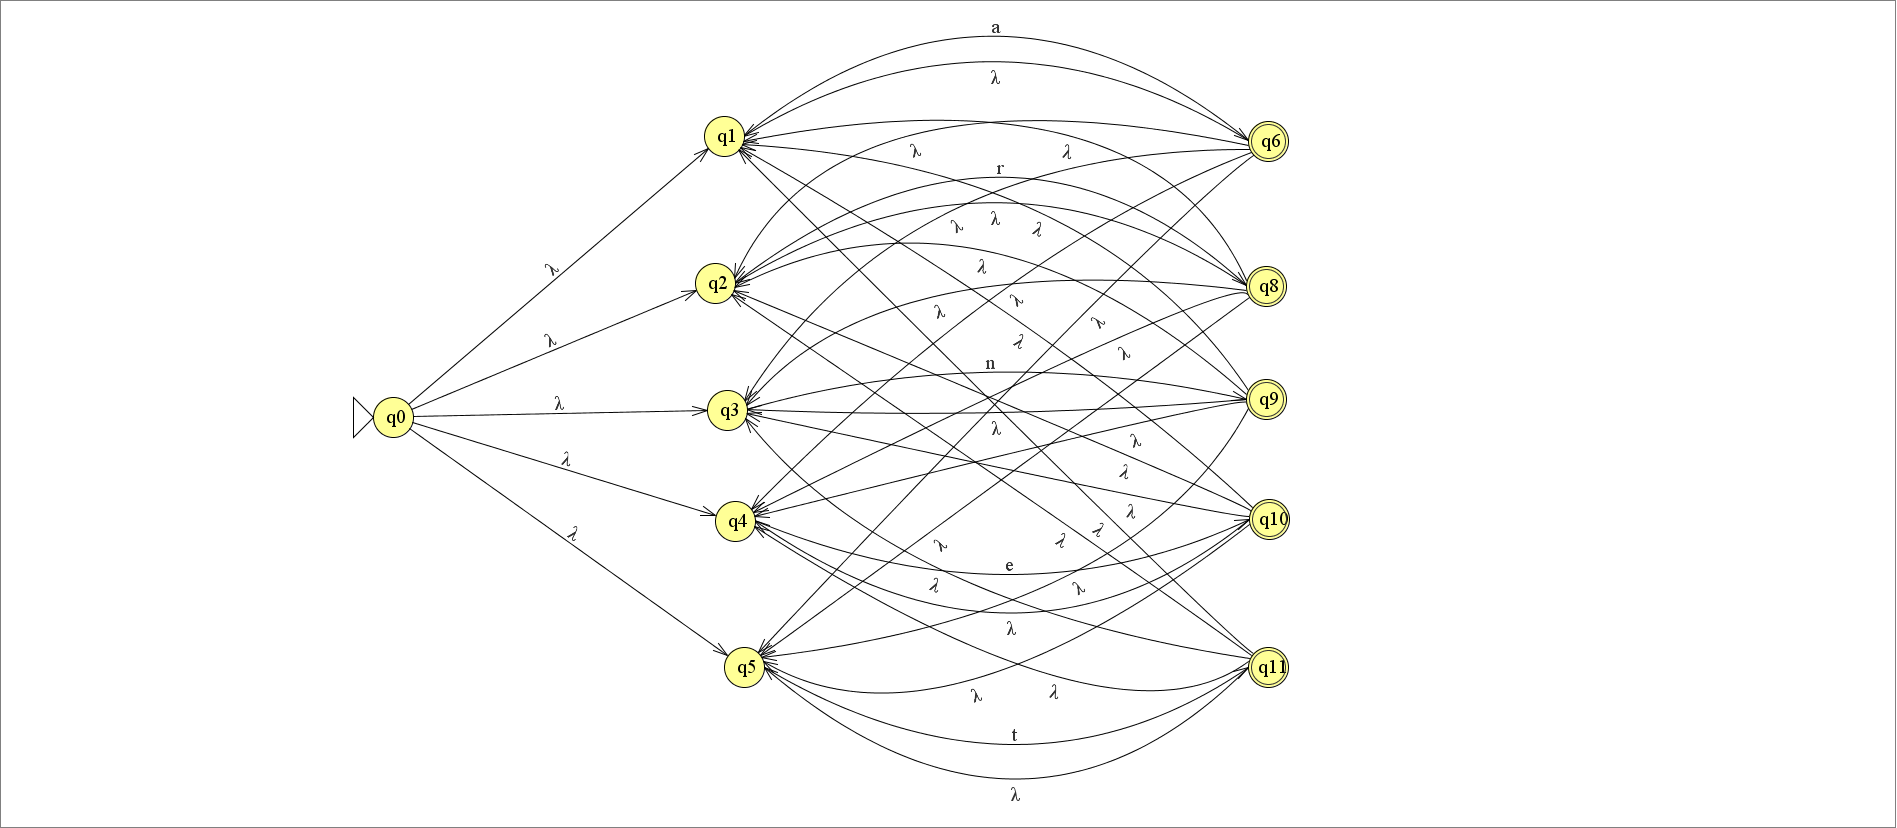

Codigo

In [5]:
automataNFR = NFA(
    states={'q0', 'q1', 'q2','q3','q4','q5','q6','q7','q8','q9','q10','q11'},
    input_symbols={'a', 'n', 'r', 't', 'e'},
    transitions={
        'q0': {'': {'q1','q2','q3','q4','q5'}},
        'q1': {'a': {'q6'}},
        'q2': {'r': {'q8'}},
        'q3': {'n': {'q9'}},
        'q4': {'e': {'q10'}},
        'q5': {'t': {'q11'}},
        'q6': {'': {'q1','q2','q3','q4','q5'}},
        'q8': {'': {'q1','q2','q3','q4','q5'}},
        'q9': {'': {'q1','q2','q3','q4','q5'}},
        'q10': {'': {'q1','q2','q3','q4','q5'}},
        'q11': {'': {'q1','q2','q3','q4','q5'}},
    },
    initial_state='q0',
    final_states={'q6','q8','q9','q10','q11'}
)

Validacion de Automata no deterministas con transicciones epsilon

In [6]:
def checkerNFA(cadena,NFA):
    try:
        NFA.validate_input(cadena)
        return "La cadena es aceptada: sus estados visitados fueron:",[step for step in NFA.validate_input(cadena, step=True)]
    except Exception as e:
        print("Entrada no valida: \n", e)
print(checkerNFA("reteaettttttererere",automataNFR))

('La cadena es aceptada: sus estados visitados fueron:', [{'q1', 'q3', 'q2', 'q0', 'q4', 'q5'}, {'q1', 'q3', 'q2', 'q8', 'q4', 'q5'}, {'q1', 'q3', 'q10', 'q2', 'q4', 'q5'}, {'q1', 'q3', 'q2', 'q11', 'q4', 'q5'}, {'q1', 'q3', 'q10', 'q2', 'q4', 'q5'}, {'q1', 'q3', 'q2', 'q6', 'q4', 'q5'}, {'q1', 'q3', 'q10', 'q2', 'q4', 'q5'}, {'q1', 'q3', 'q2', 'q11', 'q4', 'q5'}, {'q1', 'q3', 'q2', 'q11', 'q4', 'q5'}, {'q1', 'q3', 'q2', 'q11', 'q4', 'q5'}, {'q1', 'q3', 'q2', 'q11', 'q4', 'q5'}, {'q1', 'q3', 'q2', 'q11', 'q4', 'q5'}, {'q1', 'q3', 'q2', 'q11', 'q4', 'q5'}, {'q1', 'q3', 'q10', 'q2', 'q4', 'q5'}, {'q1', 'q3', 'q2', 'q8', 'q4', 'q5'}, {'q1', 'q3', 'q10', 'q2', 'q4', 'q5'}, {'q1', 'q3', 'q2', 'q8', 'q4', 'q5'}, {'q1', 'q3', 'q10', 'q2', 'q4', 'q5'}, {'q1', 'q3', 'q2', 'q8', 'q4', 'q5'}, {'q1', 'q3', 'q10', 'q2', 'q4', 'q5'}])


Automata Determinista

Diagrama de estados

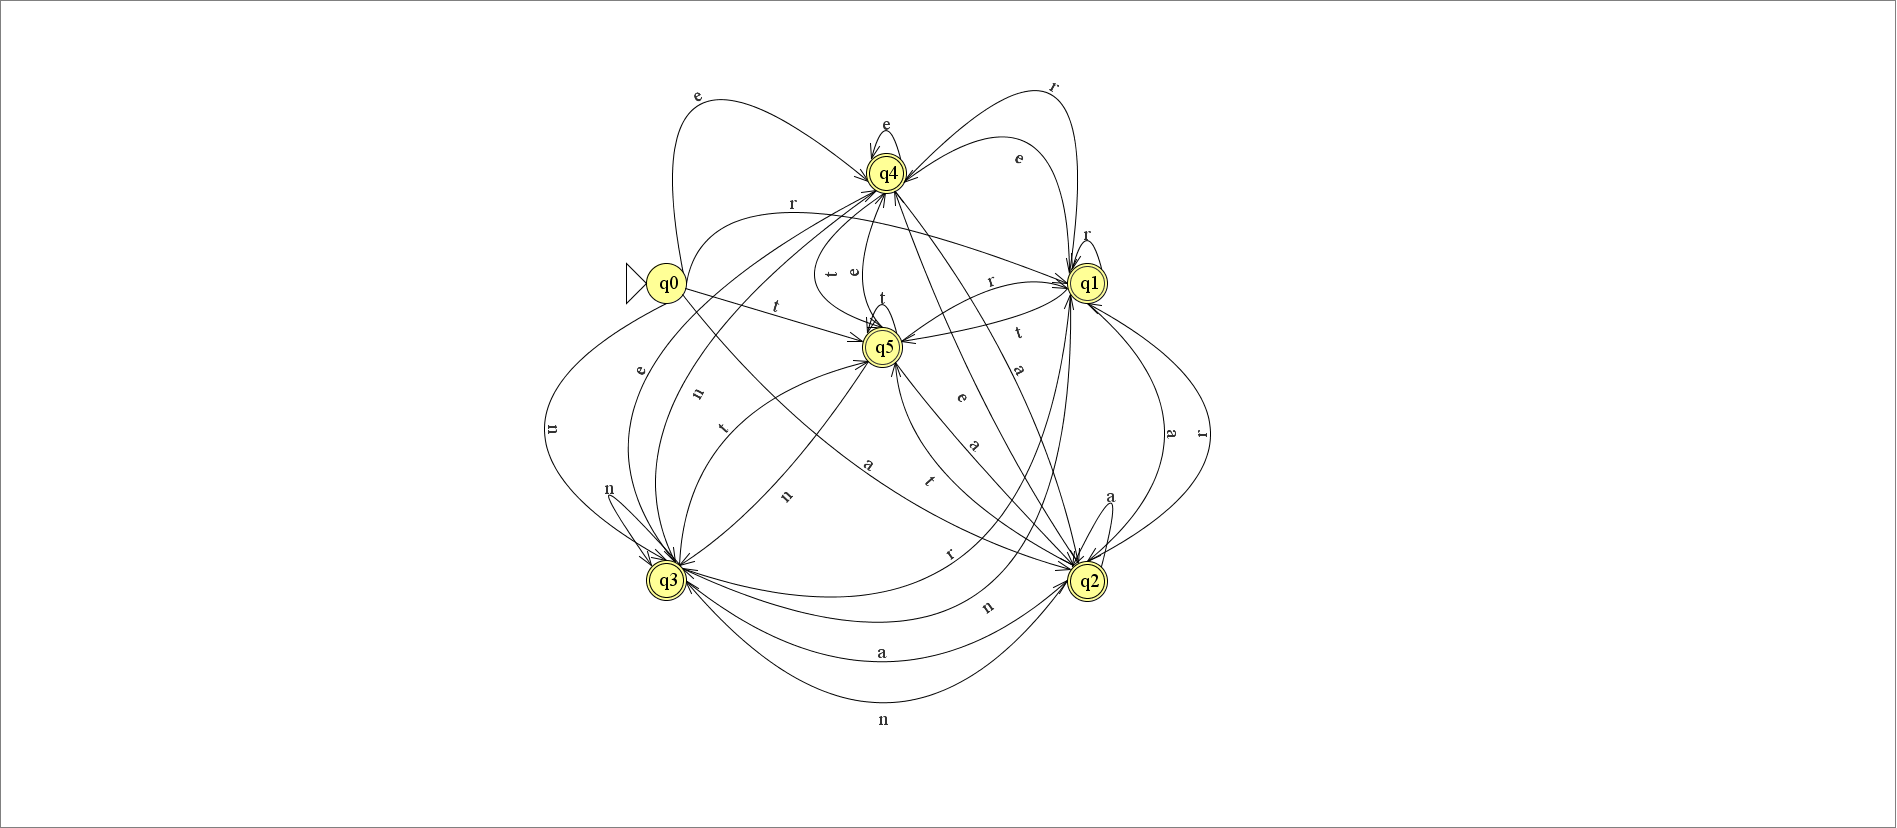

Codigo

In [7]:
automataD = DFA(
    states={'q0', 'q1', 'q2','q3','q4','q5'},
    input_symbols={'a', 'n', 'r', 't', 'e'},
    transitions={
        'q0': {'a': 'q2','r': 'q1','t': 'q5','n': 'q3','e': 'q4'},
        'q1': {'a': 'q2','r': 'q1','t': 'q5','n': 'q3','e': 'q4'},
        'q2': {'a': 'q2','r': 'q1','t': 'q5','n': 'q3','e': 'q4'},
        'q3': {'a': 'q2','r': 'q1','t': 'q5','n': 'q3','e': 'q4'},
        'q4': {'a': 'q2','r': 'q1','t': 'q5','n': 'q3','e': 'q4'},
        'q5': {'a': 'q2','r': 'q1','t': 'q5','n': 'q3','e': 'q4'}
    },
    initial_state='q0',
    final_states={'q1', 'q2','q3','q4','q5'}
)


Funcion para el resaltado del texto

In [8]:
def autoejecucion(estado,letra,index):
    
    if(estado=='q1'):
        return ("\033[95m"+codig[index])
    elif(estado=='q2'):
        return("\033[34m"+codig[index])
    elif(estado=='q3'):
        return("\035[33m"+codig[index])
    elif(estado=='q4'):
        return(" ")
    elif(estado=='q5'):
        return("\033[30m"+codig[index])


Implementacion de Automata determinista

In [9]:
transitions={
    ('q0','a'):'q2', ('q0','r'):'q1',  ('q0','t'):'q5', ('q0','n'):'q3', ('q0','e'):'q4',
    ('q1','a'):'q2', ('q1','r'):'q1',  ('q1','t'):'q5', ('q1','n'):'q3', ('q1','e'):'q4',
    ('q2','a'):'q2', ('q2','r'):'q1',  ('q2','t'):'q5', ('q2','n'):'q3', ('q2','e'):'q4',
    ('q3','a'):'q2', ('q3','r'):'q1',  ('q3','t'):'q5', ('q3','n'):'q3', ('q3','e'):'q4',
    ('q4','a'):'q2', ('q4','r'):'q1',  ('q4','t'):'q5', ('q4','n'):'q3', ('q4','e'):'q4',
    ('q5','a'):'q2', ('q5','r'):'q1',  ('q5','t'):'q5', ('q5','n'):'q3', ('q5','e'):'q4'
    }
final_states=['q1', 'q2','q3','q4','q5']

def AFD3(cadena,estado_actual,transicion,estado_aceptacion,autoincr,Codigoresaltado): 
    if cadena == "":
        return Codigoresaltado 
    else:
        letra = cadena[0]
        if(estado_actual,letra)in transicion: 
            estado_destino = transicion[(estado_actual,letra)] 
            Codigoresaltado += autoejecucion(estado_destino,letra,autoincr)
            cadena_restante = cadena[1:] 
            autoincr+=1
            return AFD3(cadena_restante,estado_destino,transicion,estado_aceptacion,autoincr,Codigoresaltado) 
        else:
            return False

# Prueba:
codtext = "def funcion2(mat,net):"
codequi = prototraductor(codtext)
print(AFD3(codequi,'q0',transitions,final_states,0,""))

def funcion2(mat,net):


Validacion de automata determinista

In [10]:
def checker(cadena,NFA):
    try:
        NFA.validate_input(cadena)
        return True
    except Exception as e:
        return False

In [11]:
expres = prototraductor("for text in range(0,1)")
automataD.validate_input(expres)

textovalid = checker(expres,automataD)

if(textovalid):
    print("Validacion Realizada: ",textovalid)
else:
    print("Validacion Realizada: ",textovalid)

Validacion Realizada:  True


In [12]:
# filesrccode = open("/content/drive/MyDrive/UIS/2021-2/Autómatas proyecto/examplepython.py")
#srccode=filesrccode.read().split("\n")
##print(filesrccode.read())
#for i in range(8):
#print(f'{i}\t{srccode[i]}')

Codigo variantes de colores para le resaltado de texto 

In [13]:
# Teoria
code = "print('hello world')"
# output = "{amarillo}print{blanco}({naranja}'hello world'{blanco})"
print("\033[33m\033"+code)

print('hello world')


In [14]:
# Colores posibles
for i in range(30,38,1):
    print(f"\033[{i}mhola mundo {i}")
for i in range(90,98,1):
    print(f"\033[{i}mhola mundo {i}")

hola mundo 30
hola mundo 31
hola mundo 32
hola mundo 33
hola mundo 34
hola mundo 35
hola mundo 36
hola mundo 37
hola mundo 90
hola mundo 91
hola mundo 92
hola mundo 93
hola mundo 94
hola mundo 95
hola mundo 96
hola mundo 97


In [15]:
# code = filesrccode.read()
# newcode = ""

# def colorCode(c):
#   for line in c:
#     print(line)